In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('/content/placement.csv')

In [20]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [22]:
df.shape

(100, 4)

In [25]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


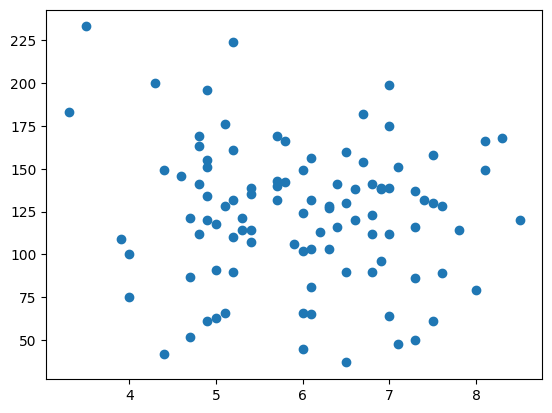

In [28]:
plt.scatter(df['cgpa'], df['iq'])

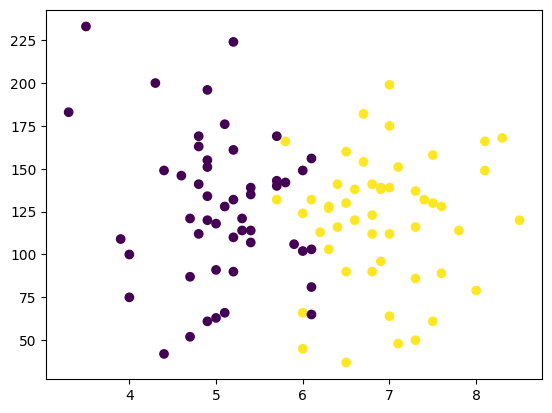

In [29]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [30]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [34]:
X.shape

(100, 2)

In [33]:
Y.shape

(100,)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1)

In [38]:
X_train

,Unnamed: 0,cgpa
18,18,4.0
16,16,5.2
47,47,5.2
22,22,4.9
39,39,4.6
2,2,5.3
82,82,6.5
97,97,6.7
98,98,6.3
20,20,6.6


In [39]:
Y_train

,placement
18,0
16,0
47,0
22,0
39,0
2,0
82,1
97,1
98,1
20,1


In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[-0.77008575, -1.71910112],
       [-0.82909615, -0.37078652],
       [ 0.08556508, -0.37078652],
       [-0.65206495, -0.70786517],
       [-0.15047653, -1.04494382],
       [-1.24216897, -0.25842697],
       [ 1.11824712,  1.08988764],
       [ 1.56082514,  1.31460674],
       [ 1.59033034,  0.86516854],
       [-0.71107535,  1.20224719]])

In [44]:
X_test = scaler.transform(X_test)

In [45]:
X_test

array([[-6.19609224e-02,  2.32584270e+00],
       [-8.88106555e-01,  6.40449438e-01],
       [-2.98002532e-01, -8.20224719e-01],
       [-5.34044141e-01,  1.65168539e+00],
       [ 3.80617095e-01,  1.08988764e+00],
       [-5.04538940e-01,  5.28089888e-01],
       [-3.57012934e-01,  1.65168539e+00],
       [ 7.93689911e-01,  6.40449438e-01],
       [-1.79981727e-01,  1.08988764e+00],
       [ 1.74080687e-01, -2.28089888e+00],
       [-1.12414816e+00,  1.91011236e-01],
       [ 1.29527833e+00, -1.26966292e+00],
       [-8.58601354e-01, -4.83146067e-01],
       [ 5.57648302e-01,  8.65168539e-01],
       [-4.16023336e-01,  2.32584270e+00],
       [ 1.38379393e+00,  2.21348315e+00],
       [ 6.75669106e-01, -5.95505618e-01],
       [ 7.64184710e-01,  8.65168539e-01],
       [-1.21266377e+00,  2.10112360e+00],
       [ 1.15070285e-01,  1.20224719e+00],
       [ 4.69132698e-01,  1.53932584e+00],
       [ 1.50181474e+00, -1.38202247e+00],
       [-1.27167417e+00,  4.15730337e-01],
       [ 4.

In [47]:
clf = LogisticRegression()

In [49]:
# This is model training stage
clf.fit(X_train, Y_train)

LogisticRegression()

In [52]:
# Evaluate the model
Y_pred = clf.predict(X_test)

In [53]:
Y_test

,placement
42,1
14,0
34,0
26,1
57,1
...,...
52,1
54,1
44,1
45,1


In [54]:
Y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0])

In [58]:
accuracy_score(Y_test, Y_pred)

0.9333333333333333

<Axes: >

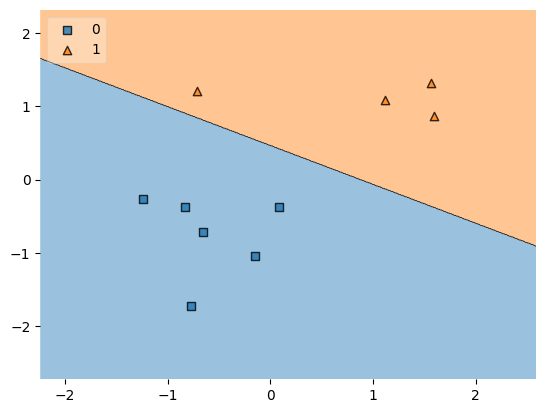

In [63]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [64]:
import pickle as pkl
pkl.dump(clf, open('model.pkl', 'wb'))